
## Сонарные данные

### Определение камня или мины

Сонар (ультразвуковой локатор) - это техника использования звука для навигации, коммуникации с объектами и определения объектов на воде или под водой, например морских судов.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

Данный набор данных содержит ответные метрики для 60 различных частот сонара, отправленных на известные объекты - мины и камни. Для каждого отправленного и полученного сигнала были записаны данные об объекте, на который направлялся сонар (мина или камень). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Исследование данных



<Axes: >

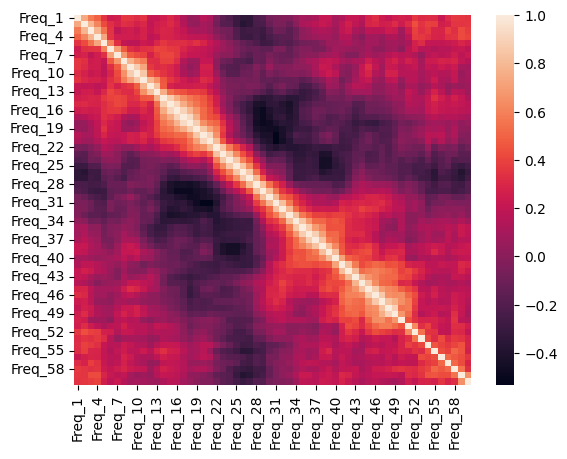

In [ ]:
sns.heatmap(data=df.corr(numeric_only=True))

In [8]:
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'R' else 1)

In [ ]:
df.corr(numeric_only=True).sort_values(ascending=False, by='Label')['Label'][:6]

Label      1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Label, dtype: float64

## Разбиение на обучающий и тестовый наборы данных


In [ ]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('Label', axis=1)
y = df['Label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=52,test_size=0.1)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
model = KNeighborsClassifier()
operations = [('scaler', scaler), ('knn', model)]
pipe = Pipeline(operations)

In [21]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {
    'knn__n_neighbors': list(range(1, 31))
}

In [27]:
grid = GridSearchCV(pipe, param_grid=param_grid,cv=5,scoring='accuracy')

In [28]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [29]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

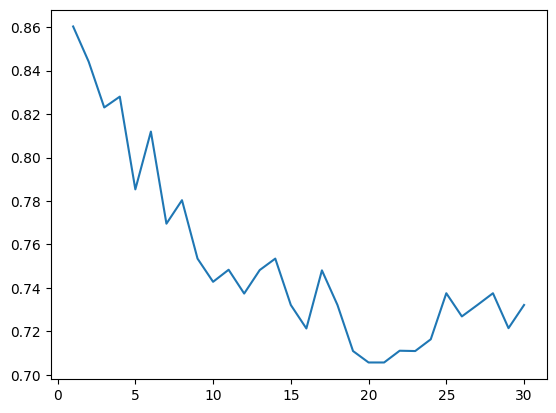

In [ ]:
y = grid.cv_results_['mean_test_score']
plt.plot(range(1,31), y)

### Финальная оценка модели


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
y_pred = grid.predict(X_test)

In [40]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.88      0.70      0.78        10

    accuracy                           0.81        21
   macro avg       0.82      0.80      0.81        21
weighted avg       0.82      0.81      0.81        21



In [38]:
confusion_matrix(y_pred,y_test)

array([[10,  1],
       [ 3,  7]])